# Preprocessed data sanity check

In [1]:
# Set notebook root to project root
from helper_functions import set_project_root

set_project_root()

# Standard library imports
from pathlib import Path

# Third party imports
import h5py
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

# Local imports
from ariel_data_preprocessing.utils import load_masked_frames
import configuration as config

# Make sure the figures directory exists
figures_dir = f'{config.FIGURES_DIRECTORY}/signal_extraction'
Path(figures_dir).mkdir(parents=True, exist_ok=True)

Working directory: /mnt/arkk/kaggle/ariel-data-challenge


## 1. Load corrected/extracted data for a sample planet

In [2]:
# Load corrected/extracted data for a sample planet
with h5py.File(f'{config.EXTRACTED_SIGNAL_DIRECTORY}/train.h5', 'r') as hdf:
    signal = load_masked_frames(hdf, planet='random')

## 2. Plot spectrogram

In [3]:
# Standardize each wavelength across frames
row_means = np.mean(signal, axis=0)
row_stds = np.std(signal, axis=0)

standardized_signal = (signal - row_means[np.newaxis, :]) / row_stds[np.newaxis, :]
print(f'Signal shape: {signal.shape}')
print(f'Standardized signal shape: {standardized_signal.shape}')

Signal shape: (5426, 283)
Standardized signal shape: (5426, 283)


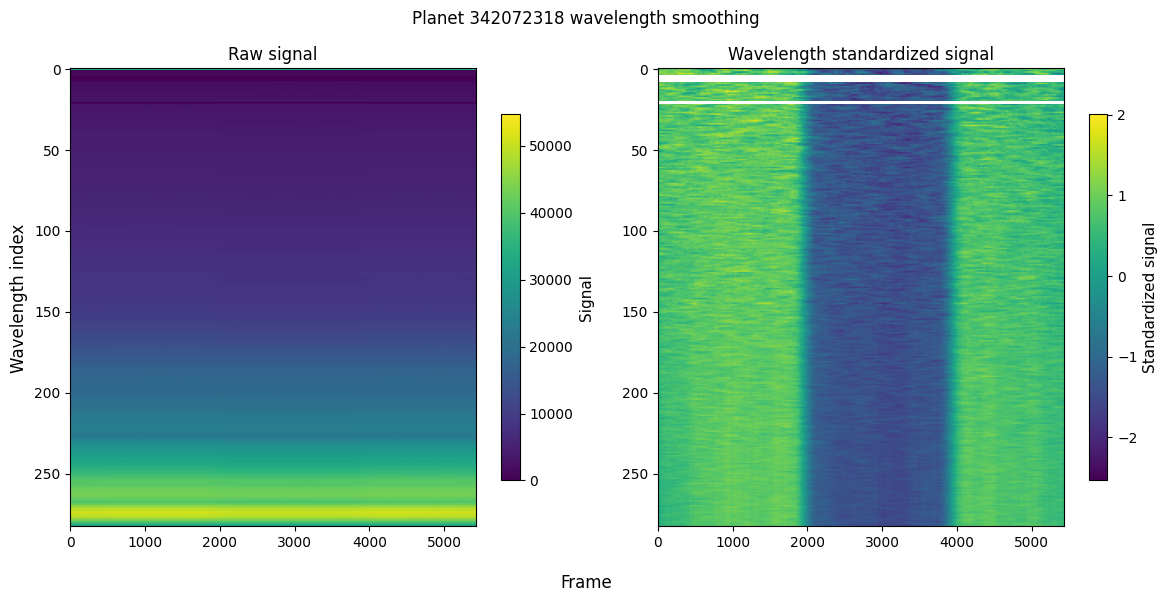

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(config.STD_FIG_WIDTH*2, config.STD_FIG_WIDTH))
fig.suptitle(f'Planet {config.SAMPLE_PLANET} wavelength smoothing')
fig.supxlabel('Frame')
fig.supylabel('Wavelength index')

axs[0].set_title('Raw signal')
im = axs[0].imshow(np.transpose(signal), aspect='auto', cmap='viridis')
cbar = plt.colorbar(im, shrink=0.8)
cbar.set_label('Signal', fontsize=11)

axs[1].set_title('Wavelength standardized signal')
im = axs[1].imshow(np.transpose(standardized_signal), aspect='auto', cmap='viridis')
cbar = plt.colorbar(im, shrink=0.8)
cbar.set_label('Standardized signal', fontsize=11)

fig.tight_layout()
fig.savefig(
    f'{figures_dir}/03.1.1-wavelength_spectrograms.jpg',
    dpi=config.STD_FIG_DPI,
    bbox_inches='tight'
)

## 3. Check wavelength values

In [9]:
print(f'FGS1 signal, frame 1: {signal[0, 0]}')
print(f'AIRS-CH0 signal, frame 1-3: {signal[0, 1:5]}')

FGS1 signal, frame 1: 54168.98334164998
AIRS-CH0 signal, frame 1-3: [1028.6530096005717 1147.6349941287579 1217.1222698406546
 1332.9653425552672]


Raw FGS1 signal at wavelength index 0 is higher than the AIRS-CH0 signal signals because the FGS1 signal is aggregated over more pixels. This tells us we combined the two in the right order.